<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/DL_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 확인

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/data/winequality-white.csv", sep=';')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [48]:
# 입력(X)과 출력(Y) 데이터 분리

X = df.drop(columns=['quality'])
Y = df['quality']
print("\nX 데이터프레임의 상위 5개 행:\n", X.head())
print("\nY 데이터의 상위 5개:\n", Y.head())


X 데이터프레임의 상위 5개 행:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  


In [49]:
# 데이터 분리: 훈련 세트와 테스트 세트
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

# 스케일링 적용 (훈련 세트와 테스트 세트 각각)
scaler = StandardScaler()

# 훈련 데이터에 fit_transform 적용
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에 transform만 적용 (훈련 세트의 스케일링 정보를 사용하여 변환)
X_test_scaled = scaler.transform(X_test)

print("\n스케일링된 X_train_scaled의 상위 5개 행:\n", X_train_scaled[:5])


스케일링된 X_train_scaled의 상위 5개 행:
 [[-1.71525170e+00 -2.26277439e-01 -3.09847527e-02 -1.01989646e+00
   2.34991780e-01 -3.63726905e-01 -3.94761272e-01 -1.18336233e+00
   1.20777431e+00  1.48920009e+00  6.47122773e-01]
 [ 4.76804606e-02 -7.71209552e-01 -2.79751681e-01 -3.31208526e-01
  -2.21748866e-01  2.75284250e-01  2.16860825e-01 -2.79284818e-01
  -1.83774095e-01 -1.22509603e+00 -2.53526879e-01]
 [-5.39963592e-01 -3.74895288e-01  1.29577220e+00 -1.14763745e-01
   3.26339909e-01 -5.96094597e-01 -4.41809126e-01  5.30966198e-02
  -1.17773724e+00  4.29105415e+00 -7.89515612e-03]
 [ 4.76804606e-02 -5.73052420e-01  4.66549104e-01 -7.54101490e-02
  -4.95793254e-01  5.07651943e-01  5.21933374e-02 -9.34076252e-01
  -5.15095144e-01 -1.40021191e+00  1.62964967e+00]
 [-1.24513646e+00 -9.69366684e-01  3.00704485e-01 -1.01989646e+00
  -4.50119189e-01 -9.44646136e-01 -1.52390976e+00 -1.83150614e+00
  -6.47623563e-01  7.15123547e-04  1.79340415e+00]]


In [50]:
# 모델 훈련 및 정확도 분석
# DT (Decision Tree)
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train_scaled, Y_train)
Y_pred_dt = dt.predict(X_test_scaled)
print("\nDT 정확도:", accuracy_score(Y_test, Y_pred_dt))

# RF (Random Forest)
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train_scaled, Y_train)
Y_pred_rf = rf.predict(X_test_scaled)
print("RF 정확도:", accuracy_score(Y_test, Y_pred_rf))

# LR (Logistic Regression)
lr = LogisticRegression(solver='liblinear', random_state=7)
lr.fit(X_train_scaled, Y_train)
Y_pred_lr = lr.predict(X_test_scaled)
print("LR 정확도:", accuracy_score(Y_test, Y_pred_lr))
print("LR 계수:", lr.coef_)
print("LR 절편:", lr.intercept_)

# KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)
Y_pred_knn = knn.predict(X_test_scaled)
print("KNN 정확도:", accuracy_score(Y_test, Y_pred_knn))


DT 정확도: 0.6357142857142857
RF 정확도: 0.6989795918367347
LR 정확도: 0.536734693877551
LR 계수: [[ 0.68932527  0.21232572 -0.23791484 -0.20155785  0.21096096  0.35799724
   0.31842191  0.08152578  0.10244708 -0.08747633  0.06995629]
 [ 0.13568816  0.61239603  0.00940263 -0.9745246  -0.00686614 -0.71177623
  -0.16575723  0.74505918 -0.04318531 -0.01480314 -0.36052436]
 [-0.05048646  0.39397834  0.01984248 -0.47422073 -0.02970273 -0.12576785
   0.13140034  0.31079705 -0.13226648 -0.15745648 -1.03057974]
 [-0.12173256 -0.38452619  0.01347715 -0.05785334  0.02635405  0.02387838
  -0.01282464  0.31345661 -0.06223051 -0.00370519  0.33584524]
 [ 0.38526332 -0.38678407 -0.1106695   1.13991483 -0.31087927  0.05964805
  -0.02443755 -1.51430461  0.40338323  0.24102614  0.21162419]
 [ 0.13733473 -0.24177792 -0.01095693  1.05703831  0.00977965  0.29329613
  -0.06333417 -1.07326821  0.20949475 -0.00323488  0.58988568]
 [ 0.45742104  0.01630231  0.14960931  0.21238072 -0.26503561 -0.04390619
  -0.05984868 -0

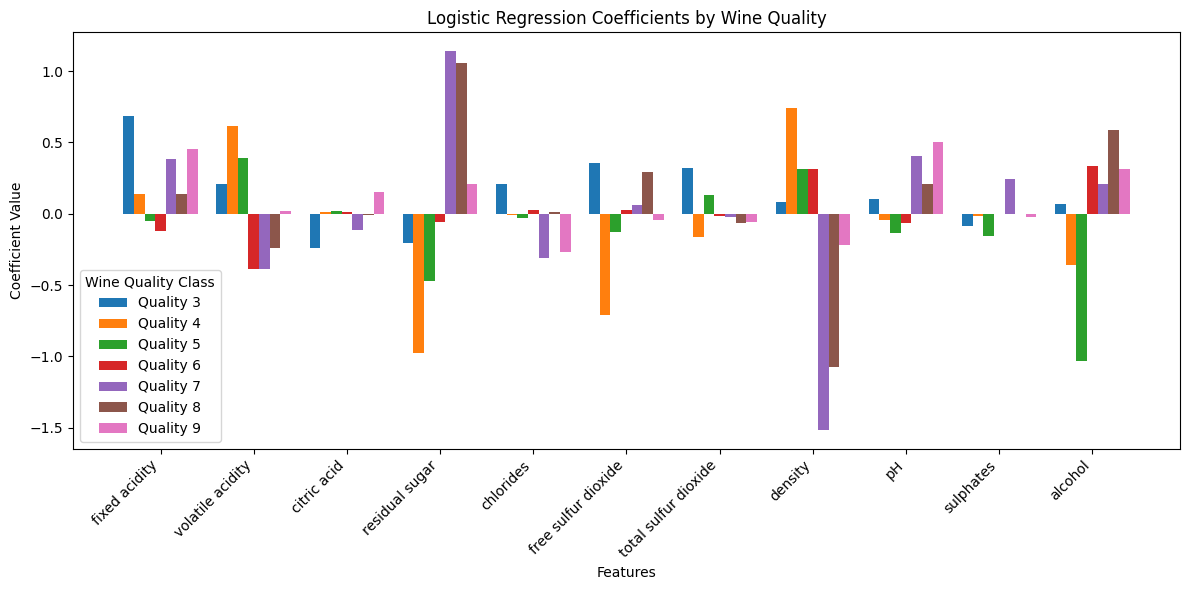

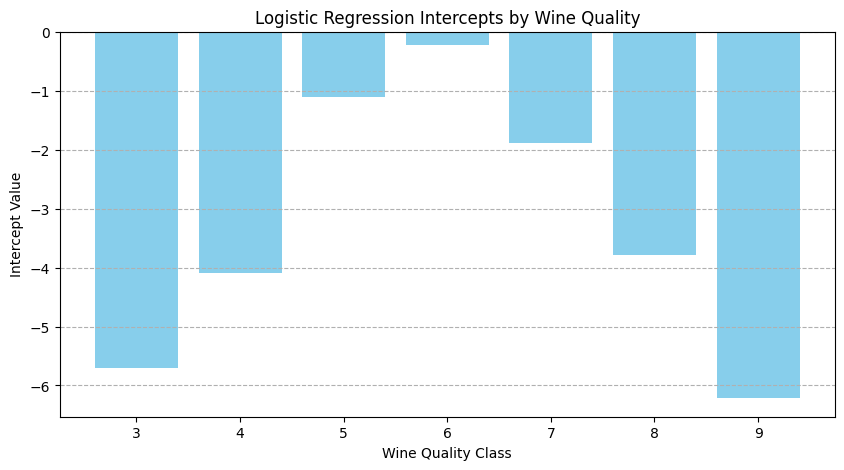

In [51]:
# LR 계수 및 절편 시각화 코드 추가 (GPT 활용)
import matplotlib.pyplot as plt
import numpy as np

# 다중 클래스 분류이므로 각 클래스(품질)에 대한 계수를 시각화
fig, ax = plt.subplots(figsize=(12, 6))
coefs = lr.coef_
feature_names = X.columns # X를 정의하는 코드가 앞에 있어야 합니다.
classes = lr.classes_
n_classes = len(classes)
n_features = len(feature_names)

# 각 클래스에 대한 계수를 그룹화된 막대 그래프로 시각화
bar_width = 0.8 / n_classes
index = np.arange(n_features)

for i, class_coef in enumerate(coefs):
    offset = bar_width * i
    ax.bar(index + offset, class_coef, bar_width, label=f'Quality {classes[i]}')

ax.set_title('Logistic Regression Coefficients by Wine Quality')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')
ax.set_xticks(index + bar_width * (n_classes - 1) / 2)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.legend(title='Wine Quality Class')
plt.tight_layout()
plt.show()

# 절편 데이터 시각화
plt.figure(figsize=(10, 5))
intercepts = lr.intercept_
plt.bar(classes, intercepts, color='skyblue')
plt.title('Logistic Regression Intercepts by Wine Quality')
plt.xlabel('Wine Quality Class')
plt.ylabel('Intercept Value')
plt.xticks(classes)
plt.grid(axis='y', linestyle='--')
plt.show()
